# Generative Adversarial Networks

Unless you've been sleeping under a rock, you've probably encountered [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661) before. At least you've seen the pictures. For instance, you can create fake images of bedrooms, as done in [this paper](https://arxiv.org/pdf/1511.06434.pdf) by Radford et al. in 2015. 

![](../img/fake_bedrooms.png)

At their heart, GANs use the notion that a data generator is good, if we cannot tell fake data apart from real data. In statistics, this is called a two-sample test - a test to answer the question whether datasets $X = \{x_1, \ldots x_n\}$ and $X' = \{x_1', \ldots x_n'\}$ were drawn from the same distribution. The main difference to most statistics papers is that GANs use this idea in a constructive way. In other words, rather than just telling a user that 'hey, these two datasets don't look like they came from the same distribution', this allows us to improve the data generator until it is close to the real data. Or at least indistinguishable from it, as far as a classifier is concerned. 

As you can see, there are two pieces to GANs - first off, we need a device (say, a deep network but it really could be anything, such as a game rendering engine) that might potentially be able to generate data that looks just like the real thing. Obviously, if we are dealing with images, this needs to generate images. If we're dealing with speech, it needs to generate audio sequences, and so on. We call this the *generator network*. The second component is the *discriminator network*. It attempts to distinguish fake and real data from each other. Both networks are in competition with each other. The generator network attempts to fool the discriminator network. At that point, the discriminator network adapts to the new fake data. This information, in turn is used to improve the generator network, and so on. 

**Generator**
* Draw some parameter $u$ from a source of randomness, e.g. a normal distribution $u \sim \mathcal{N}(0,1)$.
* Apply a function $f$ such that we get $x' = g(u,w)$
* Compute the gradient with respect to $w$ to minimize $\log p(y = \mathrm{fake}|x')$ 

**Discriminator**
* Improve the accuracy of a binary classifier $f$, i.e. maximize $\log p(y=\mathrm{fake}|x')$ and $\log p(y=\mathrm{true}|x)$ for fake and real data respectively.

In short, there are two optimization problems running simultaneously, and the optimization terminates if a stalemate has been reached. There are lots of further tricks and details on how to modify this basic setting. For instance, we could try solving this problem in the presence of side information. This leads to cGAN, i.e. conditional Generative Adversarial Networks. We can change the way how we detect whether real and fake data look the same. This leads to wGAN (Wasserstein GAN), kernel-inspired GANs and lots of other settings, or we could change how closely we look at the objects. E.g. fake images might look real at the texture level but not so at the larger level, or vice versa. 

Many of the applications are in the context of images. Since this takes too much time to solve in a Jupyter notebook on a laptop, we're going to content ourselves with fitting a much simpler distribution. We will illustrate what happens if we use GANs to build the world's most inefficient estimator of parameters for a Gaussian. Let's get started.


In [1]:
from __future__ import print_function
import matplotlib as mpl
from matplotlib import pyplot as plt

import mxnet as mx
from mxnet import gluon
from mxnet import ndarray as nd
from mxnet.gluon import nn
from mxnet import autograd
import numpy as np

ctx = mx.cpu()

## Generate some 'real' data

Since this is going to be the world's lamest example, we simply generate data drawn from a Gaussian. And let's also set a context where we'll do most of the computation.

In [2]:
X = nd.random_normal(shape=(1000, 2))
A = nd.array([[1, 2], [-0.1, 0.5]])
b = nd.array([1, 2])
X = nd.dot(X,A) + b
Y = nd.ones(shape=(1000,1))

# and stick them into an iterator
batch_size = 4
train_data = mx.io.NDArrayIter(X, Y, batch_size, shuffle=True)

Let's see what we got. This should be a Gaussian shifted in some rather arbitrary way with mean $b$ and covariance matrix $A^\top A$.

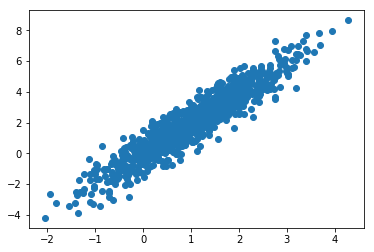

The covariance matrix is

[[ 5.          0.89999998]
 [ 0.89999998  0.25999999]]
<NDArray 2x2 @cpu(0)>


In [3]:
plt.scatter(X[:, 0].asnumpy(),X[:,1].asnumpy())
plt.show()
print("The covariance matrix is")
print(nd.dot(A, A.T))

## Defining the networks

Next we need to define how to fake data. Our generator network will be the simplest network possible - a single layer linear model. This is since we'll be driving that linear network with a Gaussian data generator. Hence, it literally only needs to learn the parameters to fake things perfectly. For the discriminator we will be a bit more discriminating: we will use an MLP with 3 layers to make things a bit more interesting. 

The cool thing here is that we have *two* different networks, each of them with their own gradients, optimizers, losses, etc. that we can optimize as we please. 

In [4]:
# build the generator
netG = nn.Sequential()
with netG.name_scope():
    netG.add(nn.Dense(2))

# build the discriminator (with 5 and 3 hidden units respectively)
netD = nn.Sequential()
with netD.name_scope():
    netD.add(nn.Dense(5, activation='tanh'))
    netD.add(nn.Dense(3 ,activation='tanh'))
    netD.add(nn.Dense(2))

# loss
loss = gluon.loss.SoftmaxCrossEntropyLoss()

# initialize the generator and the discriminator
netG.initialize(mx.init.Normal(0.02), ctx=ctx)
netD.initialize(mx.init.Normal(0.02), ctx=ctx)

# trainer for the generator and the discriminator
trainerG = gluon.Trainer(netG.collect_params(), 'adam', {'learning_rate': 0.01})
trainerD = gluon.Trainer(netD.collect_params(), 'adam', {'learning_rate': 0.05})

## Setting up the training loop

We are going to iterate over the data a few times. To make life simpler we need a few variables

In [5]:
real_label = mx.nd.ones((batch_size,), ctx=ctx)
fake_label = mx.nd.zeros((batch_size,), ctx=ctx)
metric = mx.metric.Accuracy()

# set up logging
from datetime import datetime
import os
import time

## Training loop




binary training acc at epoch 0: accuracy=0.757500
time: 1.485327


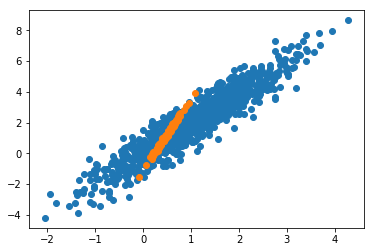


binary training acc at epoch 1: accuracy=0.642000
time: 1.451298


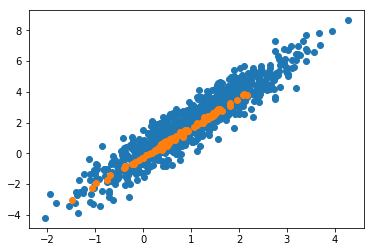


binary training acc at epoch 2: accuracy=0.553000
time: 1.649901


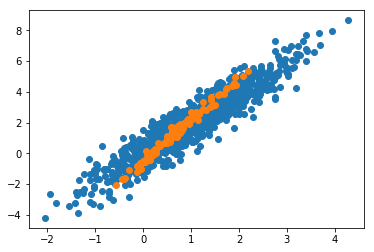


binary training acc at epoch 3: accuracy=0.534500
time: 1.585956


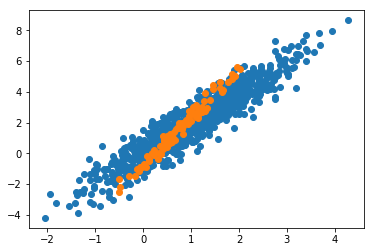


binary training acc at epoch 4: accuracy=0.503000
time: 1.499186


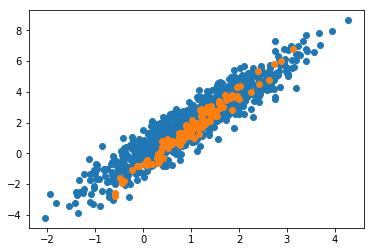


binary training acc at epoch 5: accuracy=0.510500
time: 1.433464


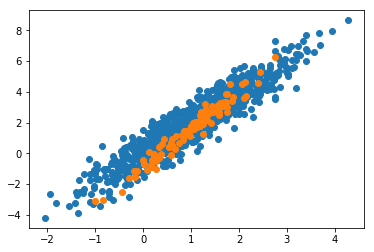


binary training acc at epoch 6: accuracy=0.508000
time: 1.429878


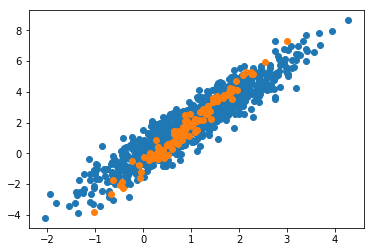


binary training acc at epoch 7: accuracy=0.491500
time: 1.523295


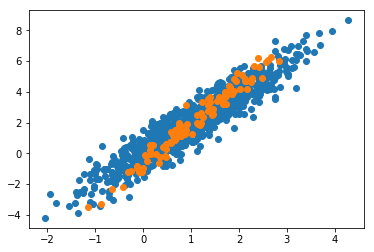


binary training acc at epoch 8: accuracy=0.501500
time: 1.444997


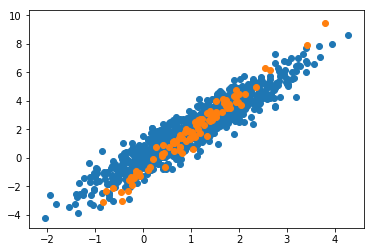


binary training acc at epoch 9: accuracy=0.503000
time: 1.445146


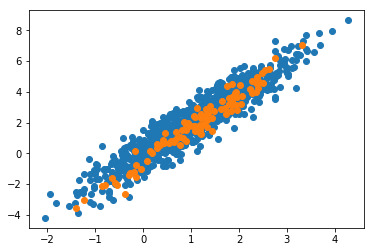

In [6]:
stamp =  datetime.now().strftime('%Y_%m_%d-%H_%M')
for epoch in range(10):
    tic = time.time()
    btic = time.time()
    train_data.reset()
    for iter, batch in enumerate(train_data):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real_t
        data = batch.data[0].as_in_context(ctx)
        noise = mx.nd.random_normal(shape=(batch_size, 2), ctx=ctx)

        with autograd.record():
            real_output = netD(data)
            errD_real = loss(real_output, real_label)
            
            fake = netG(noise)
            fake_output = netD(fake.detach())
            errD_fake = loss(fake_output, fake_label)
            errD = errD_real + errD_fake
            errD.backward()

        trainerD.step(batch_size)
        metric.update([real_label,], [real_output,])
        metric.update([fake_label,], [fake_output,])

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        with autograd.record():
            output = netD(fake)
            errG = loss(output, real_label)
            errG.backward()

        trainerG.step(batch_size)

        name, acc = metric.get()
        # logging.info('speed: {} samples/s'.format(opt.batch_size / (time.time() - btic)))
        # print('discriminator loss = %f, generator loss = %f, binary training acc = %f at iter %d epoch %d' %(mx.nd.mean(errD).asscalar(), mx.nd.mean(errG).asscalar(), acc, iter, epoch))
        
        iter = iter + 1
        btic = time.time()

    name, acc = metric.get()
    metric.reset()
    print('\nbinary training acc at epoch %d: %s=%f' % (epoch, name, acc))
    print('time: %f' % (time.time() - tic))
    noise = mx.nd.random_normal(shape=(100, 2), ctx=ctx)
    fake = netG(noise)
    plt.scatter(X[:, 0].asnumpy(),X[:,1].asnumpy())
    plt.scatter(fake[:,0].asnumpy(),fake[:,1].asnumpy())
    plt.show()




## Checking the outcome

Let's now generate some fake data and check whether it looks real.

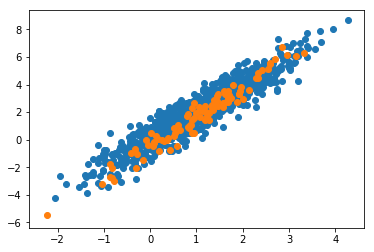

In [7]:
noise = mx.nd.random_normal(shape=(100, 2), ctx=ctx)
fake = netG(noise)

plt.scatter(X[:, 0].asnumpy(),X[:,1].asnumpy())
plt.scatter(fake[:,0].asnumpy(),fake[:,1].asnumpy())
plt.show()

## Conclusion 

A word of caution here - to get this to converge properly, we needed to adjust the learning rates *very carefully*. And for Gaussians, the result is rather mediocre - a simple mean and covariance estimator would have worked *much better*. However, whenever we don't have a really good idea of what the distribution should be, this is a very good way of faking it to the best of our abilities. Note that a lot depends on the power of the discriminating network. If it is weak, the fake can be very different from the truth. E.g. in our case it had trouble picking up anything along the axis of reduced variance. 

In summary, this isn't exactly easy to set and forget. For instance, check out [Soumith Chintala's handy list of tricks](https://github.com/soumith/ganhacks) for how to babysit GANs. 

For whinges or inquiries, [open an issue on  GitHub.](https://github.com/zackchase/mxnet-the-straight-dope)